<a href="https://colab.research.google.com/github/Mingjunzha/cs565-final-project/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Load the data**

In [ ]:
diabetes = pd.read_csv('diabetes_data_upload.csv')
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
diabetes.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
diabetes['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

Text(0.5, 1.0, 'The distribution of Data')

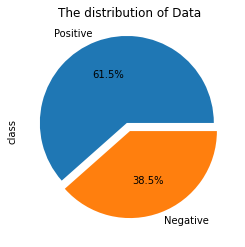

In [ ]:
diabetes["class"].value_counts().plot.pie(autopct = "%1.1f%%",explode=[.1,0])
plt.title("The distribution of Data")

Text(0.5, 1.0, 'The distribution of male')

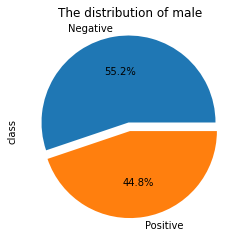

In [ ]:
df = diabetes.index[diabetes['Gender'] == 'Male']
label = diabetes.loc[:,'class']
label.loc[df].value_counts().plot.pie(autopct = "%1.1f%%",explode=[.1,0])
plt.title("The distribution of male")

Text(0.5, 1.0, 'The distribution of Female')

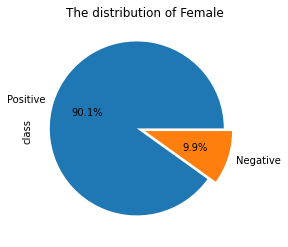

In [ ]:
df = diabetes.index[diabetes['Gender'] == 'Female']
label = diabetes.loc[:,'class']
label.loc[df].value_counts().plot.pie(autopct = "%1.1f%%",explode=[.1,0])
plt.title("The distribution of Female")

Text(0.5, 1.0, 'The distribution of Positive Polyuria')

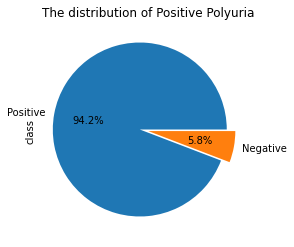

In [ ]:
df = diabetes.index[diabetes['Polyuria'] == 'Yes']
label = diabetes.loc[:,'class']
label.loc[df].value_counts().plot.pie(autopct = "%1.1f%%",explode=[.1,0])
plt.title("The distribution of Positive Polyuria")

Text(0.5, 1.0, 'The distribution of Negative Polyuria')

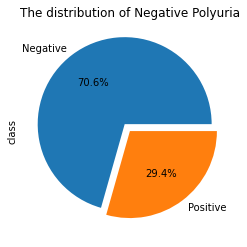

In [ ]:
df = diabetes.index[diabetes['Polyuria'] == 'No']
label = diabetes.loc[:,'class']
label.loc[df].value_counts().plot.pie(autopct = "%1.1f%%",explode=[.1,0])
plt.title("The distribution of Negative Polyuria")

**Prepossing the data**


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
diabetes['Gender'] = diabetes['Gender'].map({'Male':1,'Female':0})
diabetes['class'] = diabetes['class'].map({'Positive':1,'Negative':0})
diabetes['Polyuria'] = diabetes['Polyuria'].map({'Yes':1,'No':0})
diabetes['Polydipsia'] = diabetes['Polydipsia'].map({'Yes':1,'No':0})
diabetes['sudden weight loss'] = diabetes['sudden weight loss'].map({'Yes':1,'No':0})
diabetes['weakness'] = diabetes['weakness'].map({'Yes':1,'No':0})
diabetes['Polyphagia'] = diabetes['Polyphagia'].map({'Yes':1,'No':0})
diabetes['Genital thrush'] = diabetes['Genital thrush'].map({'Yes':1,'No':0})
diabetes['visual blurring'] = diabetes['visual blurring'].map({'Yes':1,'No':0})
diabetes['Itching'] = diabetes['Itching'].map({'Yes':1,'No':0})
diabetes['Irritability'] = diabetes['Irritability'].map({'Yes':1,'No':0})
diabetes['delayed healing'] = diabetes['delayed healing'].map({'Yes':1,'No':0})
diabetes['partial paresis'] = diabetes['partial paresis'].map({'Yes':1,'No':0})
diabetes['muscle stiffness'] = diabetes['muscle stiffness'].map({'Yes':1,'No':0})
diabetes['Alopecia'] = diabetes['Alopecia'].map({'Yes':1,'No':0})
diabetes['Obesity'] = diabetes['Obesity'].map({'Yes':1,'No':0})

In [ ]:
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
x = diabetes[['Gender','Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = diabetes['class']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier(criterion='gini')
tree.fit(x_train,y_train)

In [ ]:
accuracy = cross_val_score(estimator=tree, X=x_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracy.mean()*100))
print("std is {:.2f} %".format(accuracy.std()*100))

In [ ]:
from sklearn.metrics import accuracy_score
prediction=tree.predict(x_test)
result=accuracy_score(prediction,y_test)
print(accuracy_score(prediction,y_test))